<a href="https://colab.research.google.com/github/youssefjedidi/Aircraft_Noise_Predictor/blob/main/aircraft_noise_predictor_ML_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Regression models

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('aircraft_noise.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[['LAmax' 'A' 1500 ... 1 1695 2325]
 ['LAmax' 'A' 1600 ... 1 1695 2325]
 ['PNLTM' 'A' 1500 ... 1 1695 2325]
 ...
 ['EPNL' 'D' 80000 ... 4 6752 1254430]
 ['SEL' 'D' 80000 ... 4 6837 1254430]
 ['EPNL' 'D' 80000 ... 4 6837 1254430]]


## Encoding categorical data

In [4]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Assuming 'Op Mode' is a categorical column
gen_encoder = LabelEncoder()
X[:, 1] = gen_encoder.fit_transform(X[:, 1])
column_to_remove = 6

print(X)
# Define the column transformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [ 0 , 3 , 4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
# Now, X_encoded should contain your transformed data


[['LAmax' 0 1500 ... 1 1695 2325]
 ['LAmax' 0 1600 ... 1 1695 2325]
 ['PNLTM' 0 1500 ... 1 1695 2325]
 ...
 ['EPNL' 1 80000 ... 4 6752 1254430]
 ['SEL' 1 80000 ... 4 6837 1254430]
 ['EPNL' 1 80000 ... 4 6837 1254430]]


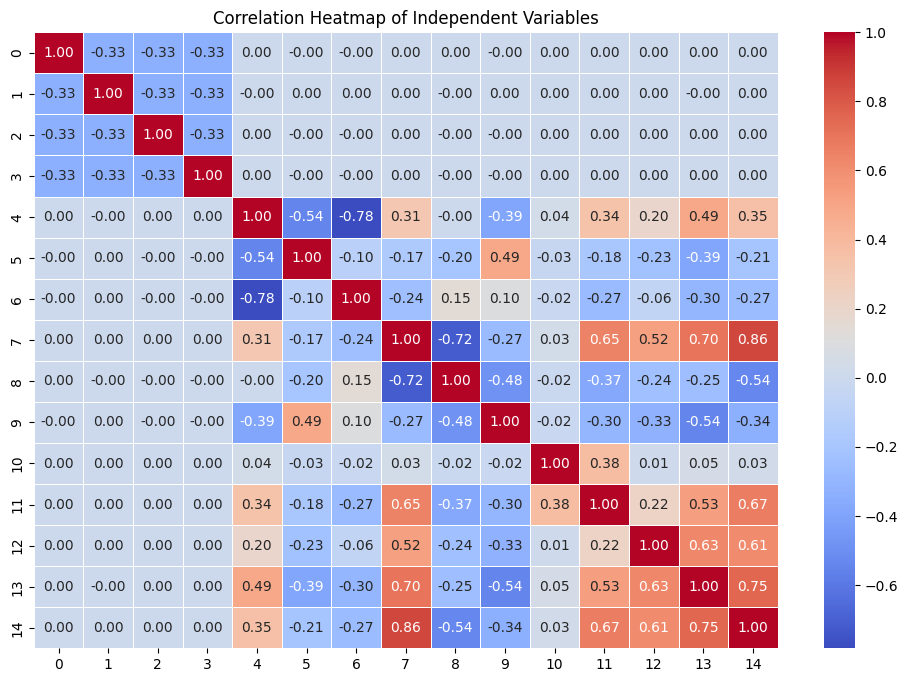

In [5]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = pd.DataFrame(X).corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Independent Variables')
plt.show()

In [6]:
X = np.delete(X, 7, axis=1)
print(X)

[[0.0 1.0 0.0 ... 1 1695 2325]
 [0.0 1.0 0.0 ... 1 1695 2325]
 [0.0 0.0 1.0 ... 1 1695 2325]
 ...
 [1.0 0.0 0.0 ... 4 6752 1254430]
 [0.0 0.0 0.0 ... 4 6837 1254430]
 [1.0 0.0 0.0 ... 4 6837 1254430]]


## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Multiple Linear Regression


### Training the Multiple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[52.65 49.1 ]
 [71.42 69.8 ]
 [68.44 61.  ]
 ...
 [67.17 62.9 ]
 [61.12 65.2 ]
 [50.41 45.2 ]]


### Testing accuracy

In [10]:
def mean_absolute_percentage_error(y_true, y_pred):
    return (np.mean(np.abs((y_true - y_pred) / y_true)) * 100)

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
#print(regressor.predict([[1, 0, 0, 1 ,0 ,0 , 0,0 ,1 , 300]]))

from sklearn.metrics import r2_score

# Assuming y_test contains the actual target values and y_pred contains the predicted values
# Calculate R squared
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R squared
n = len(y_test)  # Number of samples
p = X.shape[1]   # Number of predictors (features) in your model
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print R-squared and adjusted R-squared
print(f"R squared (r2): {r2:.4f}")
print(f"Adjusted R squared (adj_r2): {adj_r2:.4f}")

Mean Absolute Percentage Error (MAPE): 8.36%
R squared (r2): 0.6604
Adjusted R squared (adj_r2): 0.6517


## Polynomial Regression

### Training

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

### Predecting the Test set Results

In [12]:
y_poly = lin_reg_2.predict(poly_reg.fit_transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_poly.reshape(len(y_poly),1), y_test.reshape(len(y_test),1)),1))

[[49.2  49.1 ]
 [71.39 69.8 ]
 [64.35 61.  ]
 ...
 [68.36 62.9 ]
 [63.9  65.2 ]
 [49.91 45.2 ]]


### Testing accuracy

In [13]:

mape = mean_absolute_percentage_error(y_test, y_poly)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
#print(lin_reg_2.predict(poly_reg.fit_transform([[1, 0, 0, 1 ,0 ,0 , 0,0 ,1 , 300]])))

from sklearn.metrics import r2_score

# Assuming y_test contains the actual target values and y_pred contains the predicted values
# Calculate R squared
r2_poly = r2_score(y_test, y_poly)

# Calculate adjusted R squared
n = len(y_test)  # Number of samples
p = X.shape[1]   # Number of predictors (features) in your model
adj_r2 = 1 - (1 - r2_poly) * (n - 1) / (n - p - 1)

# Print R-squared and adjusted R-squared
print(f"R squared (r2): {r2_poly:.4f}")
print(f"Adjusted R squared (adj_r2): {adj_r2:.4f}")

Mean Absolute Percentage Error (MAPE): 6.87%
R squared (r2): 0.7628
Adjusted R squared (adj_r2): 0.7566


## Support Vector Regression (SVR)

### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler


sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)  # Scale and update the fourth column
X_test_scaled = sc_X.transform(X_test)

X_scaled[: , 0:-4] = X_train[: , 0:-4]
X_test_scaled[: , 0:-4] = X_test[: ,0:-4]

# Initialize StandardScaler for the target variable
sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))  # Fit and transform the target variable
y_test_scaled = sc_y.transform(y_test.reshape(-1, 1))

# Now X_scaled and y_scaled are scaled versions of X and y using StandardScaler
print("Scaled X:")
print(X_scaled)
print("\nScaled y:")
print(y_scaled)

Scaled X:
[[ 0.    0.    0.   ... -0.44 -0.54 -0.74]
 [ 0.    0.    0.   ...  0.83  0.37 -0.13]
 [ 0.    0.    1.   ...  0.83  0.08 -0.26]
 ...
 [ 0.    0.    1.   ... -0.44 -0.99 -0.53]
 [ 1.    0.    0.   ... -0.44  0.22 -0.45]
 [ 0.    1.    0.   ... -0.44 -0.04 -0.64]]

Scaled y:
[[ 0.64]
 [ 1.69]
 [ 0.13]
 ...
 [-0.51]
 [ 1.03]
 [-1.56]]


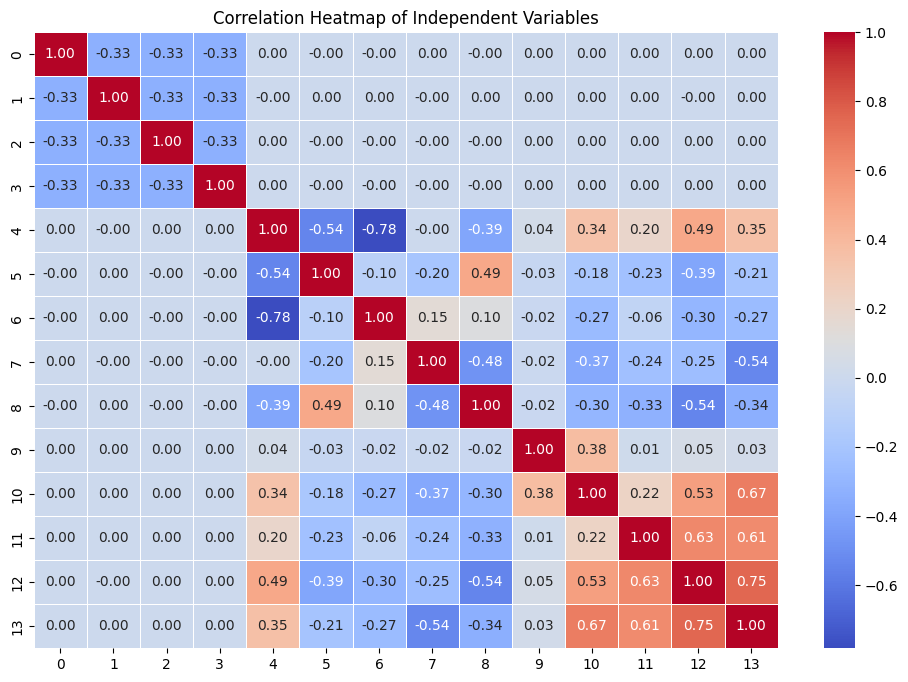

In [15]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = pd.DataFrame(X).corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Independent Variables')
plt.show()




In [16]:
print(dataset.columns)
'''# Get the original categorical variables
original_categorical_columns = dataset.columns

# Get the indices of the original categorical variables in the encoded feature array
categorical_indices = slice(1, 9)    # Update these indices based on your specific encoding

# Get the original categorical features
original_categorical_features = ct.named_transformers_['encoder'].inverse_transform(X[:, categorical_indices])

# Create a DataFrame to display the original categorical features
original_categorical_df = pd.DataFrame(original_categorical_features, columns=original_categorical_columns)

# Display the original categorical features
print(original_categorical_df)
'''

Index(['NPD_ID', 'Noise Metric', 'Op Mode', 'Power Setting', 'Engine Type',
       'Wight class', 'Number Of Engines', 'Landing Distance', 'MTOW(Ibs)',
       'L_10000ft'],
      dtype='object')


"# Get the original categorical variables\noriginal_categorical_columns = dataset.columns\n\n# Get the indices of the original categorical variables in the encoded feature array\ncategorical_indices = slice(1, 9)    # Update these indices based on your specific encoding\n\n# Get the original categorical features\noriginal_categorical_features = ct.named_transformers_['encoder'].inverse_transform(X[:, categorical_indices])\n\n# Create a DataFrame to display the original categorical features\noriginal_categorical_df = pd.DataFrame(original_categorical_features, columns=original_categorical_columns)\n\n# Display the original categorical features\nprint(original_categorical_df)\n"

### Training the SVR model

In [17]:
from sklearn.svm import SVR
sv_regressor = SVR(kernel = 'rbf')
sv_regressor.fit(X_scaled, y_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predicting

In [18]:
# Perform predictions using the SVR model on the scaled test features
y_svr_scaled = sv_regressor.predict(X_test_scaled)

# Inverse transform the scaled predictions to get them back to the original scale
y_svr = sc_y.inverse_transform(y_svr_scaled.reshape(-1, 1))

np.set_printoptions(precision=2)
print(np.concatenate((y_svr.reshape(len(y_svr),1), y_test.reshape(len(y_test),1)),1))

[[47.21 49.1 ]
 [67.62 69.8 ]
 [62.51 61.  ]
 ...
 [67.2  62.9 ]
 [59.9  65.2 ]
 [49.15 45.2 ]]


### Testing accuracy

In [19]:

mape = mean_absolute_percentage_error(y_test, y_svr)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

from sklearn.metrics import r2_score

# Assuming y_test contains the actual target values and y_pred contains the predicted values
# Calculate R squared
r2_svr = r2_score(y_test, y_svr)

# Calculate adjusted R squared
n = len(y_test)  # Number of samples
p = X.shape[1]   # Number of predictors (features) in your model
adj_r2 = 1 - (1 - r2_svr) * (n - 1) / (n - p - 1)

# Print R-squared and adjusted R-squared
print(f"R squared (r2): {r2_svr:.4f}")
print(f"Adjusted R squared (adj_r2): {adj_r2:.4f}")

Mean Absolute Percentage Error (MAPE): 20.14%
R squared (r2): 0.7966
Adjusted R squared (adj_r2): 0.7914


## Decision Tree



### Training the Decision Tree model on the Training set

In [20]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

###Predicting

In [21]:
y_tree = tree_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_tree.reshape(len(y_tree),1), y_test.reshape(len(y_test),1)),1))

[[49.1  49.1 ]
 [66.   69.8 ]
 [61.   61.  ]
 ...
 [67.6  62.9 ]
 [68.55 65.2 ]
 [45.2  45.2 ]]


### Testing accuracy

In [22]:
mape = mean_absolute_percentage_error(y_test, y_tree)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
#print(tree_regressor.predict([[1, 0, 0, 1 ,0 ,0 , 0,0 ,1 , 300]]))

from sklearn.metrics import r2_score

# Assuming y_test contains the actual target values and y_pred contains the predicted values
# Calculate R squared
r2 = r2_score(y_test, y_tree)
# Calculate adjusted R squared
n = len(y_test)  # Number of samples
p = X.shape[1]   # Number of predictors (features) in your model
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print R-squared and adjusted R-squared
print(f"R squared (r2): {r2:.4f}")
print(f"Adjusted R squared (adj_r2): {adj_r2:.4f}")

Mean Absolute Percentage Error (MAPE): 3.81%
R squared (r2): 0.9054
Adjusted R squared (adj_r2): 0.9029


## Random Forest

### Training the Random Forest model on the Training set

In [23]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators = 100)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

### Predicting

In [24]:
y_forest = forest_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_forest.reshape(len(y_forest),1), y_test.reshape(len(y_test),1)),1))

[[47.91 49.1 ]
 [66.34 69.8 ]
 [60.1  61.  ]
 ...
 [64.63 62.9 ]
 [66.86 65.2 ]
 [47.98 45.2 ]]


### Testing accuracy

In [25]:

#print(tree_regressor.predict([[1, 0, 0, 1 ,0 ,0 , 0,0 ,1 , 300 , 2 , 2624 , 13000 ]]))

from sklearn.metrics import r2_score

# Assuming y_test contains the actual target values and y_pred contains the predicted values
# Calculate R squared
r2 = r2_score(y_test, y_forest)
# Calculate adjusted R squared
n = len(y_test)  # Number of samples
p = X.shape[1]   # Number of predictors (features) in your model
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print R-squared and adjusted R-squared
print(f"R squared (r2): {r2:.4f}")
print(f"Adjusted R squared (adj_r2): {adj_r2:.4f}")

R squared (r2): 0.9291
Adjusted R squared (adj_r2): 0.9273


##XGBoost Model

In [52]:
from xgboost import XGBRegressor
XGB_regressor = XGBRegressor()
XGB_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
y_XGB = XGB_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_XGB.reshape(len(y_XGB),1), y_test.reshape(len(y_test),1)),1))

[[48.99 49.1 ]
 [68.02 69.8 ]
 [60.09 61.  ]
 ...
 [64.2  62.9 ]
 [67.1  65.2 ]
 [47.43 45.2 ]]


In [54]:
r2 = r2_score(y_test, y_XGB)

# Calculate adjusted R squared
n = len(y_test)  # Number of samples
p = X.shape[1]   # Number of predictors (features) in your model
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print R-squared and adjusted R-squared
print(f"R squared (r2): {r2:.4f}")
print(f"Adjusted R squared (adj_r2): {adj_r2:.4f}")

R squared (r2): 0.9742
Adjusted R squared (adj_r2): 0.9735


##catboost Model

In [29]:
!pip install catboost

from catboost import CatBoostRegressor

cat_regressor = CatBoostRegressor()
cat_regressor.fit(X_train, y_train)

Learning rate set to 0.046441
0:	learn: 11.2281766	total: 51.2ms	remaining: 51.2s
1:	learn: 10.9064014	total: 63ms	remaining: 31.4s
2:	learn: 10.6101377	total: 65.5ms	remaining: 21.8s
3:	learn: 10.3388352	total: 70ms	remaining: 17.4s
4:	learn: 10.0897081	total: 74.7ms	remaining: 14.9s
5:	learn: 9.8632030	total: 84.1ms	remaining: 13.9s
6:	learn: 9.6230185	total: 91ms	remaining: 12.9s
7:	learn: 9.3999160	total: 93.3ms	remaining: 11.6s
8:	learn: 9.1758732	total: 96.5ms	remaining: 10.6s
9:	learn: 8.9826153	total: 99.7ms	remaining: 9.87s
10:	learn: 8.7865375	total: 103ms	remaining: 9.25s
11:	learn: 8.6107831	total: 106ms	remaining: 8.74s
12:	learn: 8.4436873	total: 109ms	remaining: 8.3s
13:	learn: 8.2964351	total: 123ms	remaining: 8.69s
14:	learn: 8.1543896	total: 126ms	remaining: 8.28s
15:	learn: 8.0136235	total: 129ms	remaining: 7.94s
16:	learn: 7.8904582	total: 134ms	remaining: 7.75s
17:	learn: 7.7645803	total: 137ms	remaining: 7.5s
18:	learn: 7.6552607	total: 141ms	remaining: 7.28s
19:	

In [30]:
y_cat = cat_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_cat.reshape(len(y_cat),1), y_test.reshape(len(y_test),1)),1))

[[47.83 49.1 ]
 [67.53 69.8 ]
 [61.62 61.  ]
 ...
 [64.85 62.9 ]
 [66.89 65.2 ]
 [47.44 45.2 ]]


In [31]:
r2 = r2_score(y_test, y_cat)

# Calculate adjusted R squared
n = len(y_test)  # Number of samples
p = X.shape[1]   # Number of predictors (features) in your model
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print R-squared and adjusted R-squared
print(f"R squared (r2): {r2:.4f}")
print(f"Adjusted R squared (adj_r2): {adj_r2:.4f}")

R squared (r2): 0.9722
Adjusted R squared (adj_r2): 0.9715


##Fine tuning & Validation


In [32]:
#print(forest_regressor.predict([[1, 0, 0, 1 ,0 ,0 , 0,0 ,1 , 1, 0, 0 , 300 , 2 , 2624 , 13000 ]]))
#print(XGB_regressor.predict([[1, 0, 0, 1 ,0 ,0 , 0,0 ,1 , 1, 0, 0 , 300 , 2 , 2624 , 13000 ]]))

In [48]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [4],
    'learning_rate': [0.205],
    'subsample': [ 0.8 ],
    'n_estimators':[558]
}

# Create the XGBoost model object
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best set of hyperparameters:  {'learning_rate': 0.205, 'max_depth': 4, 'n_estimators': 558, 'subsample': 0.8}
Best score:  0.9732879855620602


In [55]:
from xgboost import XGBRegressor
XGB_regressor = XGBRegressor(max_depth = 4 , learning_rate =0.205 , subsample= 0.8 , n_estimators =558)
XGB_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.205, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=558, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = XGB_regressor, X = X_train, y = y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.42 %
Standard Deviation: 0.66 %
